<a href="https://colab.research.google.com/github/rajputvishwesh/Retail-Sales-Prediction-Regression/blob/main/Retail_Sales_Prediction_Regression(capstone_project_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Retails Sales Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1** -**Vishwesh Singh**

# **Project Summary -**

This project aims to forecast the daily sales of Rossmann stores for up to six weeks in advance. It uses historical sales data for 1,115 Rossmann stores, which is provided in two datasets: Rossmann and Store. The main goal is to predict the "Sales" column for the test set.

Tools:
This project uses Python 3, Jupyter Notebook, and several Python libraries, including Pandas, Numpy, Matplotlib, Seaborn, and Scikit-learn.

Data:
The project merges the Rossmann and Store datasets to create a single dataset with 1,017,209 rows and 18 columns. The dataset has no duplicated rows or columns but has duplicated values. The Store dataset has missing values.

Project Steps:
The project follows several steps, including Data Cleaning and Data Wrangling, Exploratory Data Analysis (EDA), Hypothetical Testing, Feature Engineering, and Model Deployment. Data Cleaning involves merging the two datasets and handling missing and null values. EDA uses visualizations to analyze the data and identify correlations and interesting insights. Hypothetical Testing conducts a two-sample t-test to test the hypothesis that stores located closer to competition have lower sales. Feature Engineering involves filling missing values, handling null values, deleting unnecessary columns, feature processing, feature extracting, outlier handling, and feature selection. Model Deployment deploys two regression models, Linear Regression and Lasso Regression, and compares their performance using evaluation metrics like mean squared error (MSE) and R-squared (R2) score.

Conclusion:
The project successfully predicts the daily sales of Rossmann stores using regression models. Both the Linear Regression and Lasso Regression models have similar performance, with the Lasso Regression model having slightly better performance than the Linear Regression model. The project evaluates model performance using MSE and R2 score.

Acknowledgements:
This project is part of the Retail Sales Prediction challenge on Kaggle, using data provided by Rossmann.

## **GitHub Link -** https://github.com/rajputvishwesh/Retail-Sales-Prediction-Regression

# **Problem Statement**



Rossmann is a retail chain operating more than 3,000 drug stores in 7 European countries. The daily sales prediction for up to six weeks in advance is a crucial task for Rossmann store managers. There are numerous factors affecting store sales, including promotions, competition, holidays, seasonality, and locality. As every manager is responsible for predicting sales based on their unique circumstances, the accuracy of results can vary widely.

To solve this problem, historical sales data for 1,115 Rossmann stores is provided. The goal is to forecast the "Sales" column for the test set, while keeping in mind that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [4]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Loading Rossman Dataset
rossmann_ret_df= pd.read_csv('/content/drive/MyDrive/retail sales prediction capstone/Rossmann Stores Data.csv')

<ipython-input-5-d77a3ede08ae>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_ret_df= pd.read_csv('/content/drive/MyDrive/retail sales prediction capstone/Rossmann Stores Data.csv')


In [6]:
#Loading Store Dataset
stores_ret_df=pd.read_csv('/content/drive/MyDrive/retail sales prediction capstone/store.csv', low_memory= False)

### Dataset First View

**Rossman Dataset**

In [7]:
#First Look
rossmann_ret_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [10]:
rossmann_ret_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


**Store Dataset**

In [11]:
stores_ret_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [12]:
stores_ret_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [84]:
# Dataset Rows & Columns count of rossman dataset
rossmann_ret_df.shape


(1017209, 9)

In [14]:
# Dataset Rows & Columns count of store dataset
stores_ret_df.shape

(1115, 10)

#**Merging of both datasets**

In [8]:
#merge the datasets on stores data
ret_df = rossmann_ret_df.merge(right=stores_ret_df, on="Store", how="left")

In [16]:
#first ten rows of the merged dataset
ret_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Dataset Information

In [17]:
# Dataset Info
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [18]:
ret_df.shape

(1017209, 18)

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

# Find duplicate rows based on all columns
duplicate_rows = ret_df[ret_df.duplicated()]

# Print the number of duplicate rows
print(f'There are {len(duplicate_rows)} duplicate rows in the data.')

# Find duplicate rows based on a specific column(s)
duplicate_sales = ret_df[ret_df.duplicated(subset=['Sales'])]

# Print the number of duplicate sales
print(f'There are {len(duplicate_sales)} rows with duplicate sales values.')

There are 0 duplicate rows in the data.
There are 995475 rows with duplicate sales values.


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
ret_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

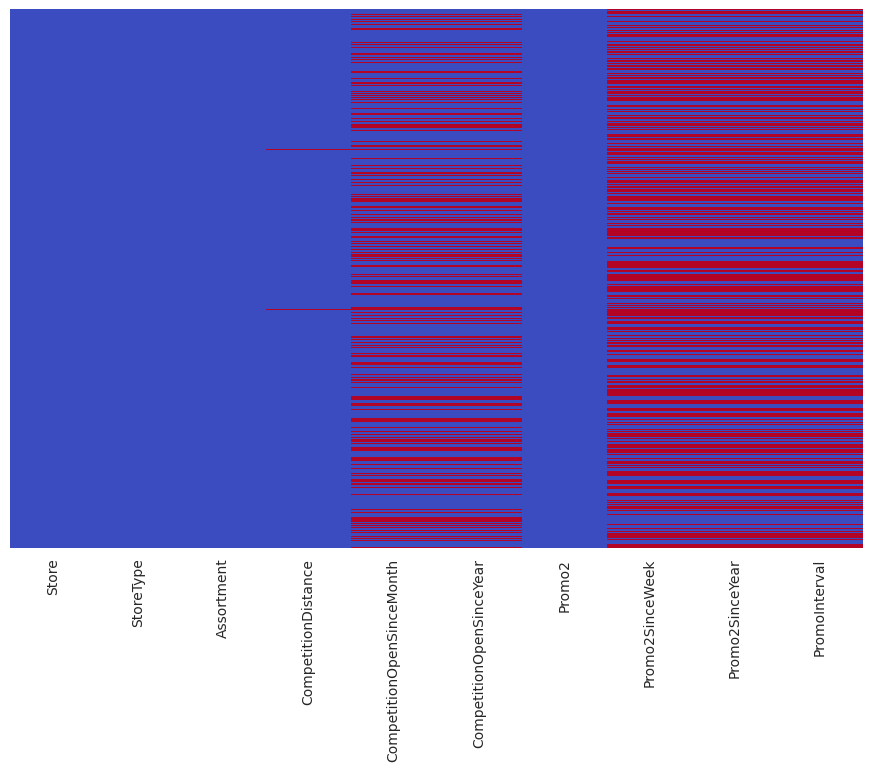

In [12]:
# Visualizing the missing values
# creating heatmap for null values
plt.figure(figsize=(11,7))
sns.heatmap(stores_ret_df.isnull(),yticklabels= False, cbar= False, cmap= 'coolwarm')

<ipython-input-13-d6fd52e8c77f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ret_df['CompetitionDistance'], color='brown', hist = True)


Text(0.5, 0, '\nCompetition Distance Distribution Plot')

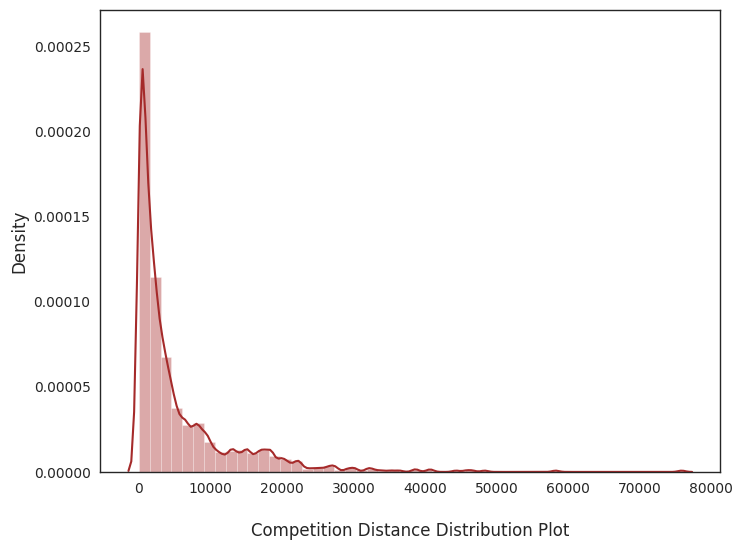

In [13]:
#distribution plot of competition distance
sns.distplot(x=ret_df['CompetitionDistance'], color='brown', hist = True)
plt.xlabel('\nCompetition Distance Distribution Plot')

### What did you know about your dataset?

The project uses two datasets, namely rossmann and store. The rossmann dataset has 1017209 rows and 9 columns, while the store dataset has 1115 rows and 9 columns. After merging the two datasets, the resulting dataset has 1017209 rows and 18 columns. There are no duplicated rows or columns, but there are some duplicated values. The store dataset has some missing values that need to be handled.

## ***2. Understanding Your Variables***

In [90]:
# Dataset Columns
ret_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
# Dataset Describe
ret_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in ret_df.columns:
    unique_values = ret_df[column].unique()
    print(f'{column}: {unique_values}')

Store: [   1    2    3 ... 1113 1114 1115]
DayOfWeek: [5 4 3 2 1 7 6]
Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **Replace missing values in features with low percentages of missing values**

<ipython-input-15-fbbca6417eb5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ret_df.CompetitionDistance.dropna(), color='orange')


Text(0.5, 1.0, 'Distributin of Store Competition Distance\n')

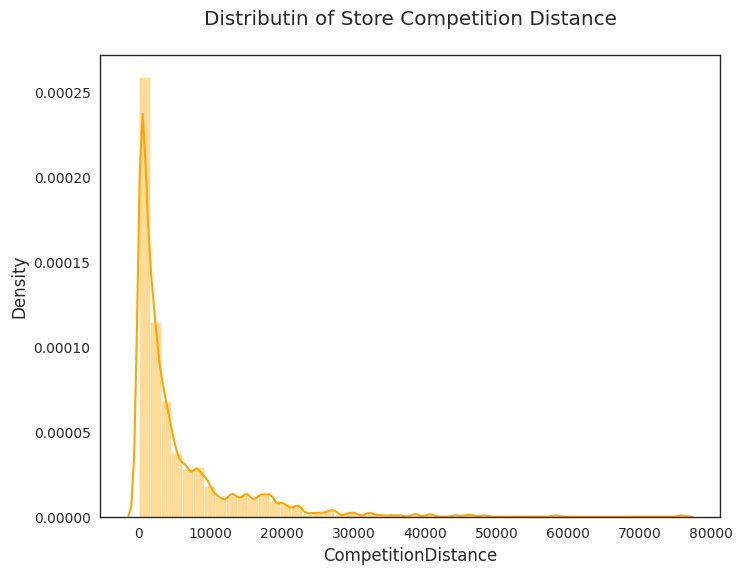

In [15]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(ret_df.CompetitionDistance.dropna(), color='orange')
plt.title("Distributin of Store Competition Distance\n")

In [16]:
#replace missing values in CompetitionDistance with median for the store dataset

ret_df.CompetitionDistance.fillna(ret_df.CompetitionDistance.median(), inplace=True)

In [17]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [18]:
#creating features from the date
ret_df['Year'] = pd.DatetimeIndex(ret_df['Date']).year
ret_df['Month'] = pd.DatetimeIndex(ret_df['Date']).month
ret_df['WeekOfYear'] = pd.DatetimeIndex(ret_df['Date']).week
ret_df['DayOfYear'] = pd.DatetimeIndex(ret_df['Date']).dayofyear
years = ret_df['Year'].unique()

<ipython-input-18-480f4658ec5f>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ret_df['WeekOfYear'] = pd.DatetimeIndex(ret_df['Date']).week


### What all manipulations have you done and insights you found?

The all manipulations are:
  * Replace missing values in features with low percentages of missing values
  * replace missing values in CompetitionDistance with median for the store dataset
  * creating a categorical column list it is also necessary to work with categorical columns
  * We have changed stateholiday to integer type
  * creating features from the date

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

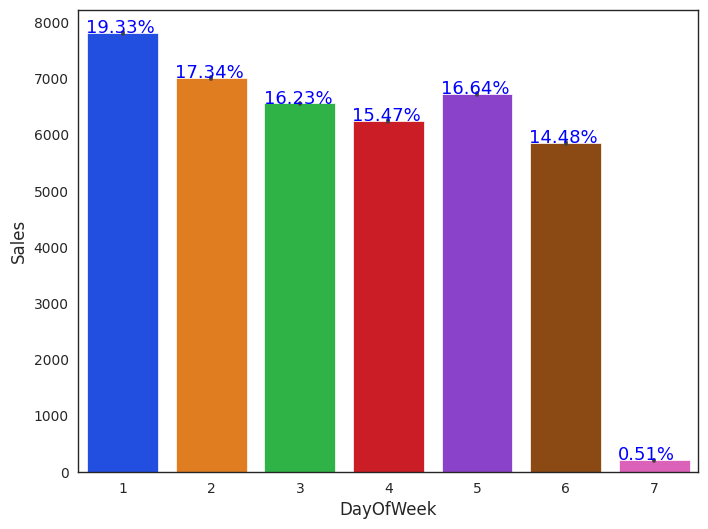

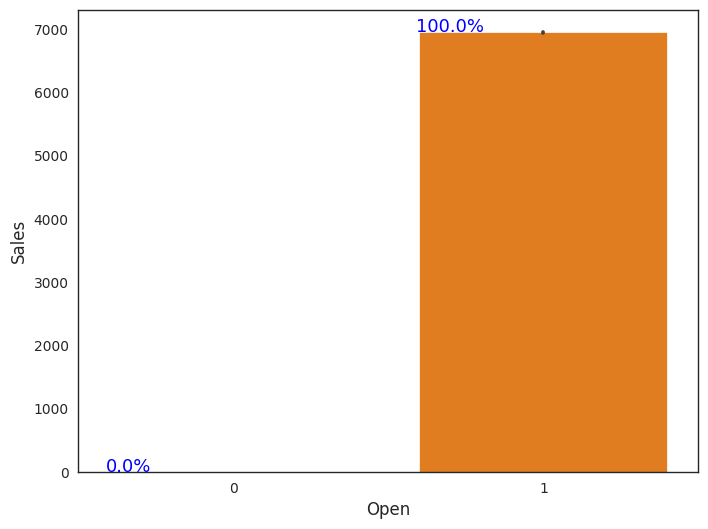

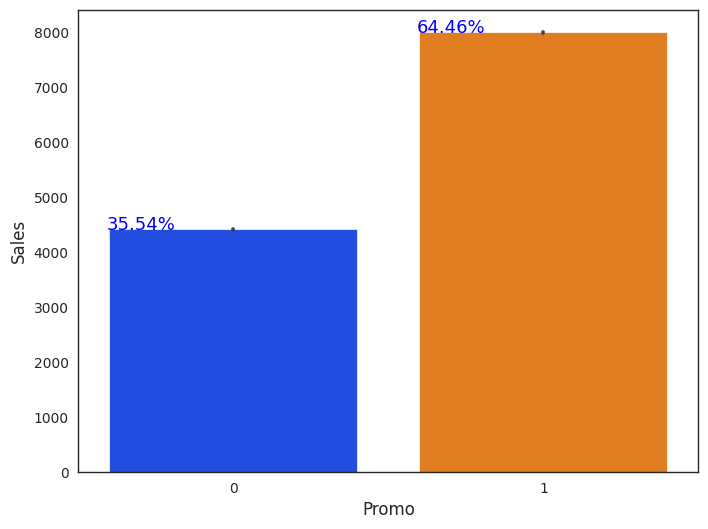

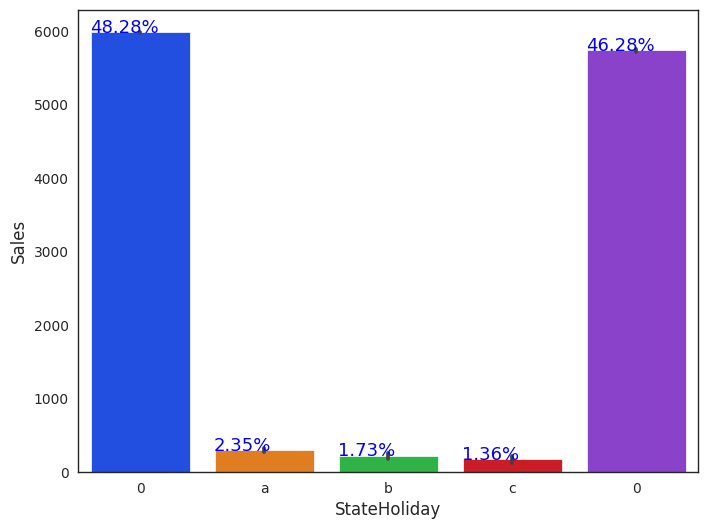

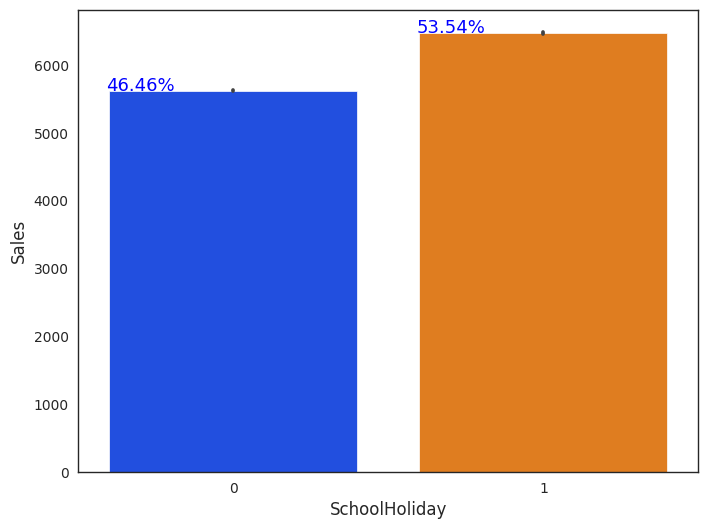

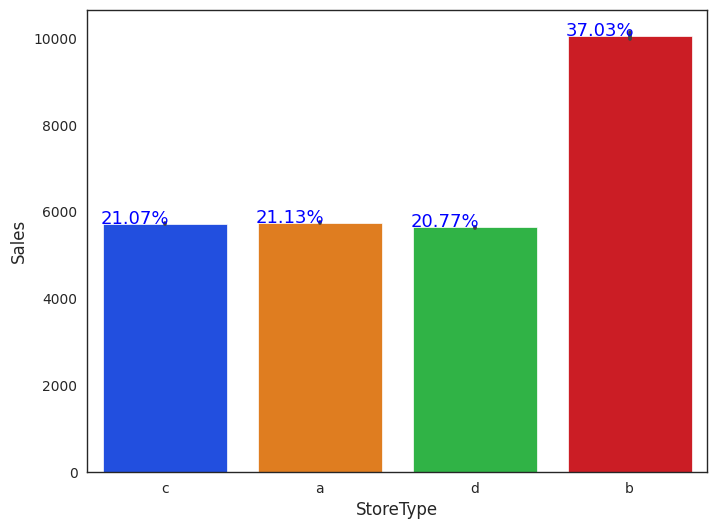

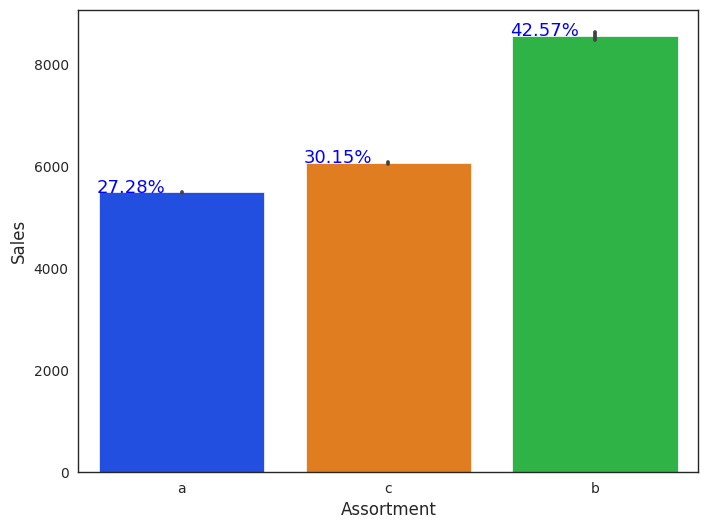

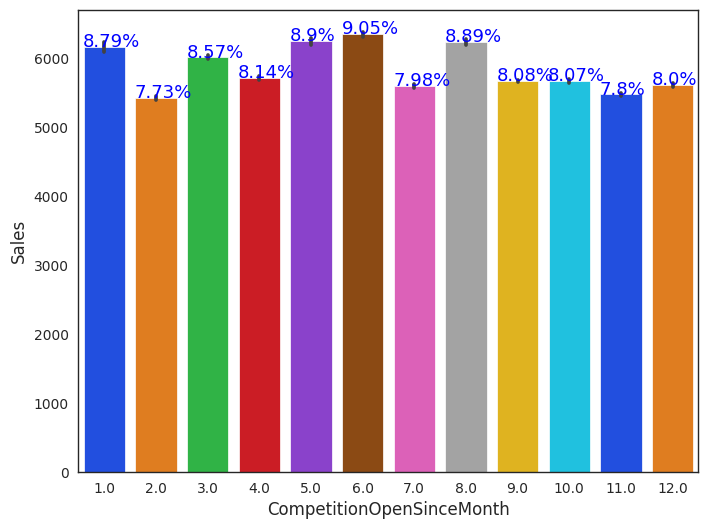

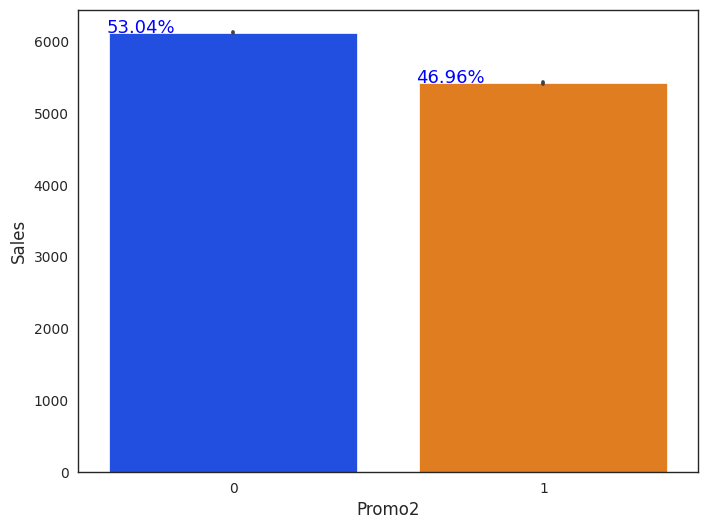

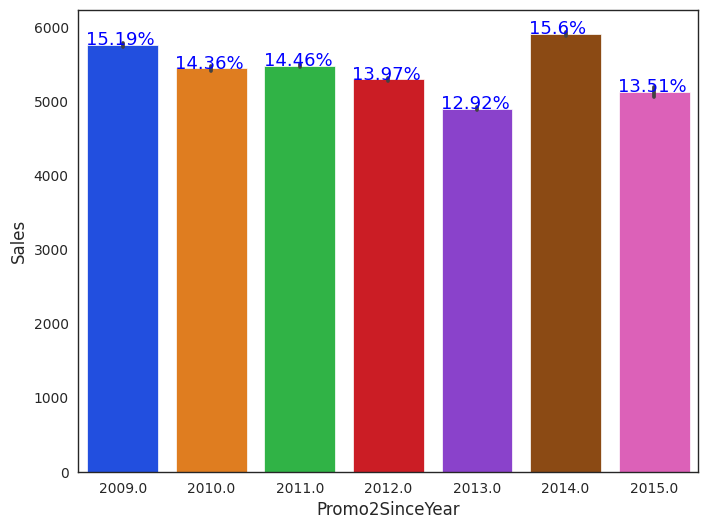

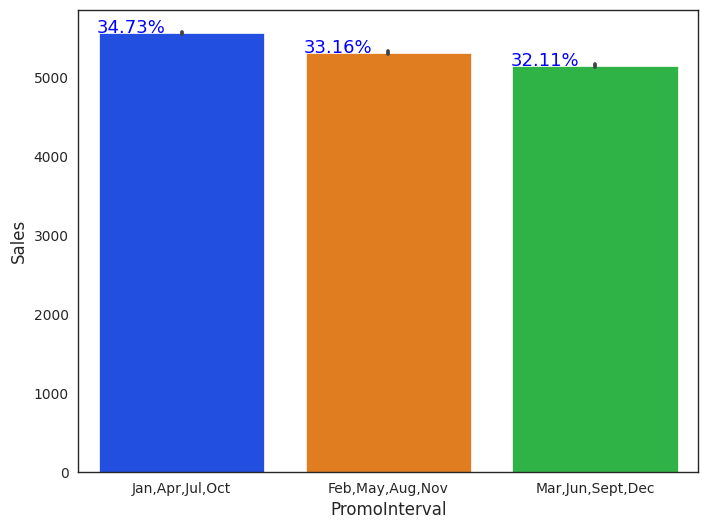

In [19]:
# Chart - 1 visualization 
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=ret_df[value], y=ret_df['Sales'], palette='bright') 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', color='blue', fontsize=13)  #text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

I want to all insights about the categorical values

##### 2. What is/are the insight(s) found from the chart?

####Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Understanding the impact of categorical variables on sales is crucial in predicting future sales and making informed business decisions. The analysis revealed some negative insights, such as lower sales during state holidays and lower sales when promotions were not offered. By identifying these trends, businesses can adjust their strategies and promotions to increase sales during specific times and improve overall performance.

#### Chart - 2

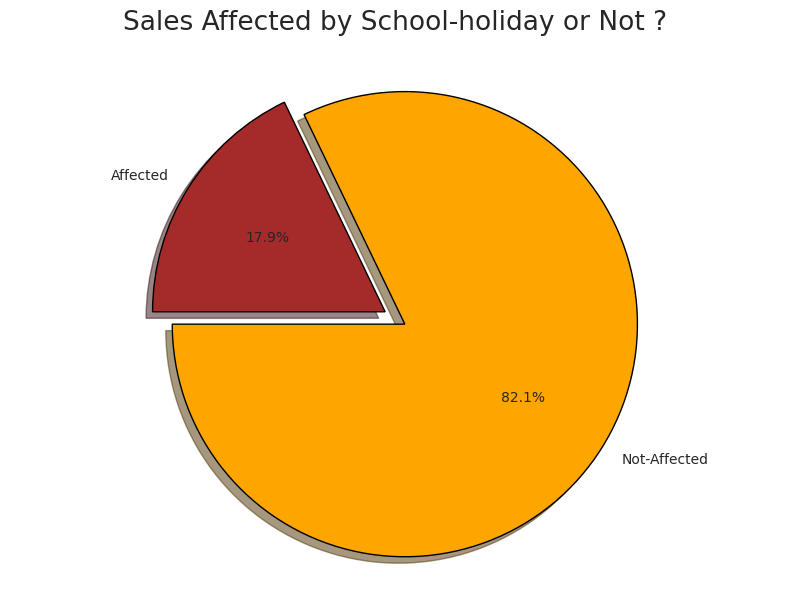

In [20]:
# Chart - 2 visualization code
#Sales affected on schoolholidays or not
labels = ['Not-Affected', 'Affected']
sizes = rossmann_ret_df.SchoolHoliday.value_counts()
colors = ['orange', 'brown']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=180, explode=(0.1, 0.0), 
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
ax.set_title("Sales Affected by School-holiday or Not ?\n", fontsize=19)
ax.axis('equal')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To know the how many sales afffected by schoolholiday.

##### 2. What is/are the insight(s) found from the chart?


The analysis indicates that a significant majority of the sales, accounting for 82.1%, remain unaffected by school holidays, while only a minor portion, 17.9%, is impacted.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Certainly, analyzing the impact of different factors on sales is important for identifying areas that need improvement. It is encouraging to see that the majority of sales are not affected, while only a small percentage is affected by certain factors. By understanding the impact of different factors on sales, businesses can make informed decisions and take steps to improve their performance in areas that need attention.

#### Chart - 3

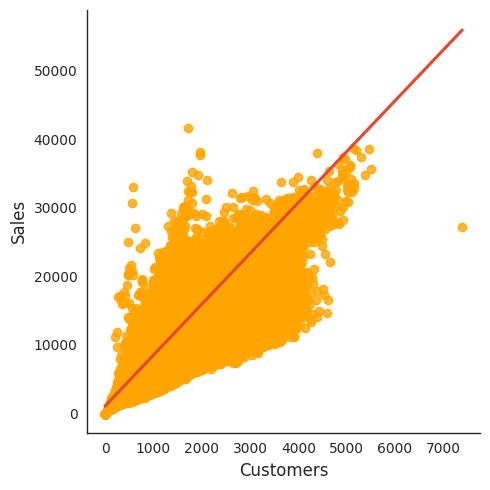

In [21]:
# Chart - 3 visualization code
sns.lmplot(x='Customers', y='Sales', data=ret_df, scatter_kws={'color': 'orange'})

##### 1. Why did you pick the specific chart?

 To know the customer vs sales relation.

##### 2. What is/are the insight(s) found from the chart?


It is apparent from the data that there is a direct correlation between the number of customers and sales. As the number of customers increases, the sales also increase, indicating a linear relationship between these two variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


It is encouraging to observe a positive correlation between the number of customers and sales, where an increase in the number of customers leads to a corresponding increase in sales.

#### Chart - 4

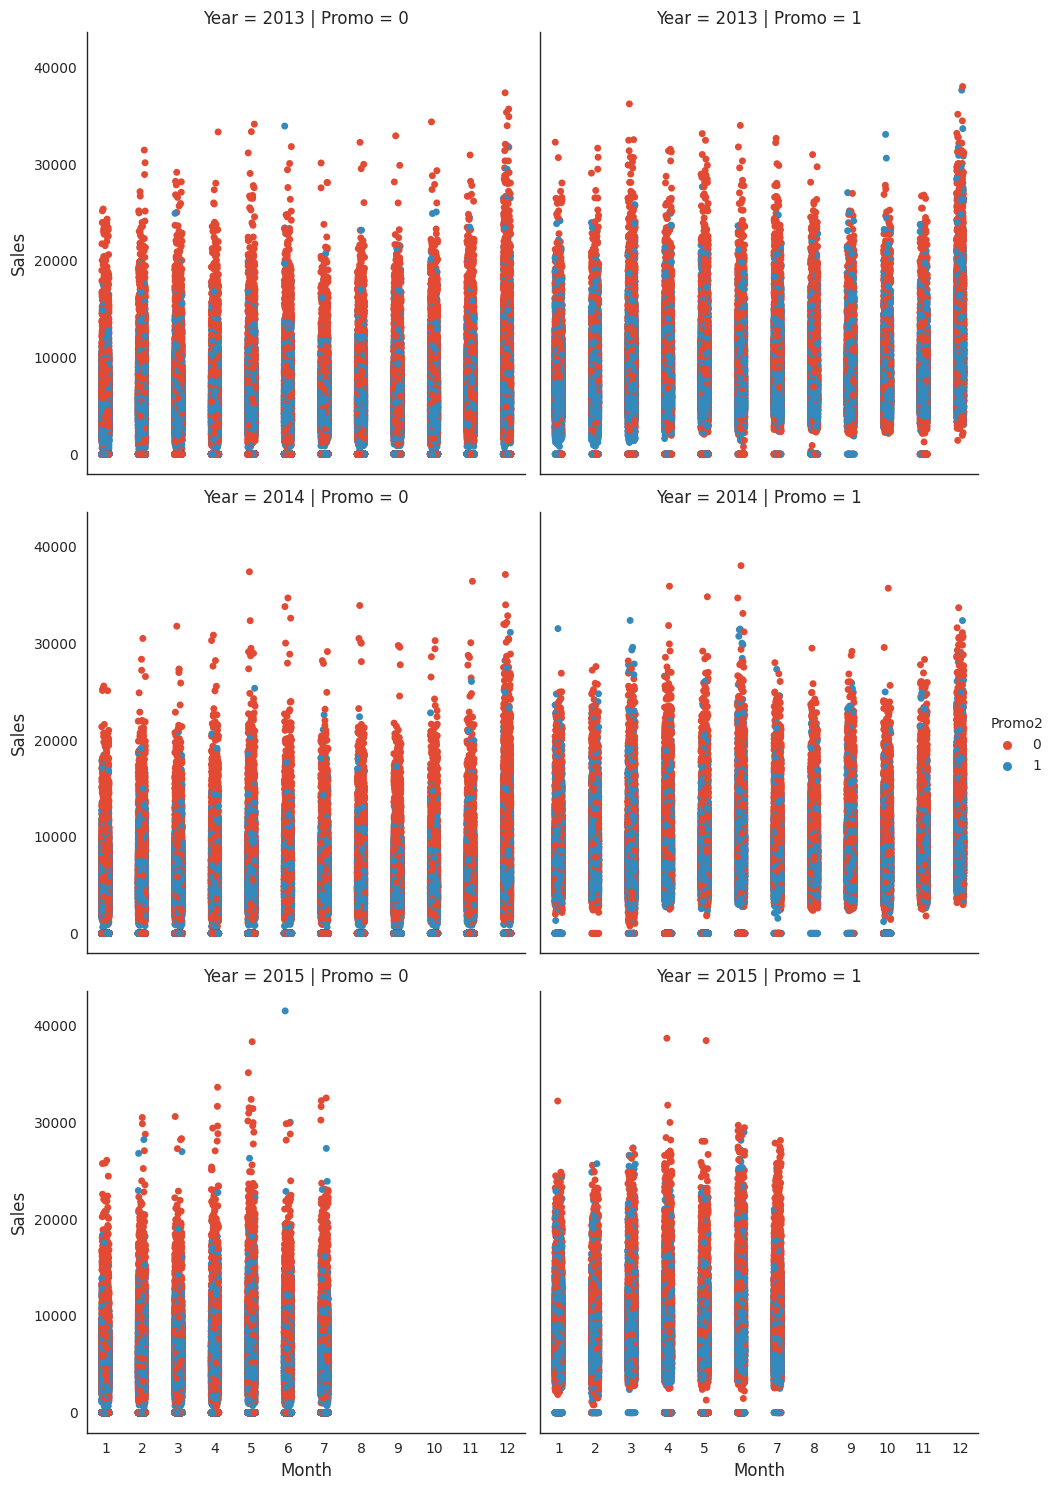

In [22]:
# Chart - 4 visualization code
#Promo vs sales relation
sns.catplot(data = ret_df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year")

##### 1. Why did you pick the specific chart?

To know the promo vs sales relation

##### 2. What is/are the insight(s) found from the chart?


The data shows that sales are significantly higher when a promotion is running, whereas without any promotion, sales are considerably lower.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Certainly, the impact of using a promo on sales is significant. The data clearly shows that when a promo is being used, there is an increase in sales, whereas if there is no promo, it has a negative impact on sales. This information is important for making decisions on when and how to use promos to boost sales.

#### Chart - 5

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

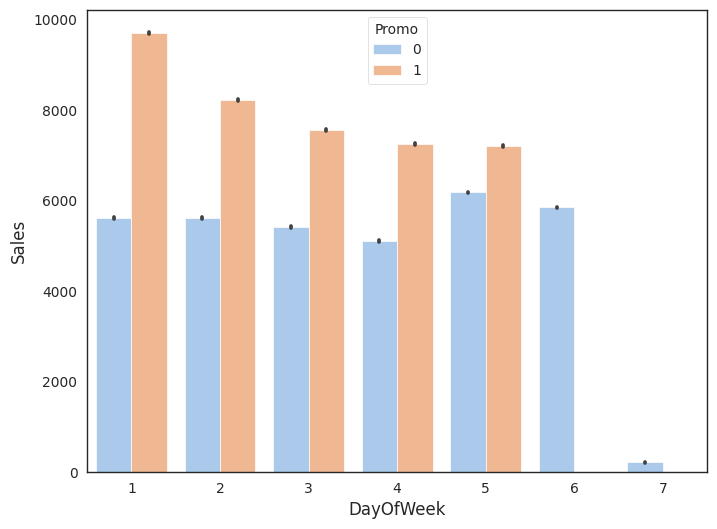

In [23]:
# Chart - 5 visualization code
#Barchart of promo vs sales impact
sns.barplot(data = ret_df, x = "DayOfWeek", y = "Sales", hue = "Promo", palette='pastel')

##### 1. Why did you pick the specific chart?

To know the exact diffrence of sales when promo using and not using

##### 2. What is/are the insight(s) found from the chart?

There is a notable difference in sales on Mondays compared to other days, and the sales trend seems to be decreasing gradually as the week progresses. Additionally, there is no sales data available for Sundays, which shows a dip in the visualization.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


No, we cannot solely attribute the increase in sales to the promotion as there could be other factors that might have influenced sales. Therefore, it is essential to explore and identify other ways to boost sales besides promotions or find a balance between using promotions and other strategies. Alternatively, we can also consider running promotions more frequently, such as using them every day, to maintain sales growth.

#### Chart - 6

<ipython-input-24-3b594d4382cb>:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data=ret_df, x="Month", y="Sales", col="Year", hue="StoreType", palette=['brown', 'pink'])


<Figure size 900x700 with 0 Axes>

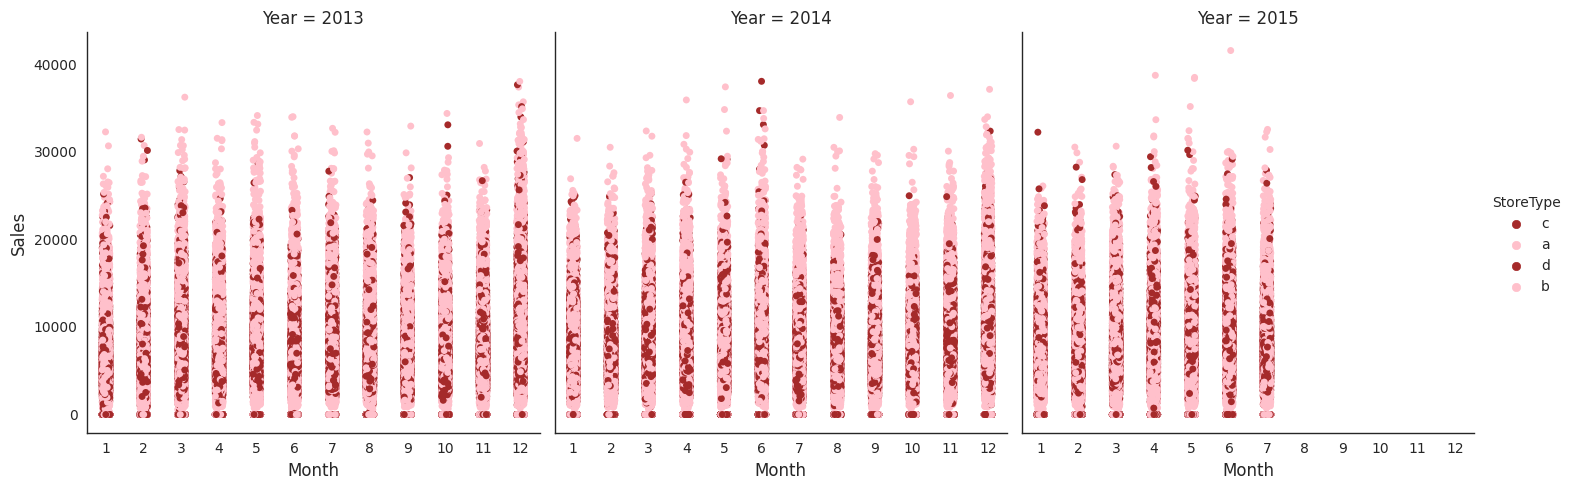

In [24]:
# Chart - 6 visualization code
#Trend of sales over the years
# Create a categorical plot with color-coded bars
plt.figure(figsize=(9,7))
sns.catplot(data=ret_df, x="Month", y="Sales", col="Year", hue="StoreType", palette=['brown', 'pink'])
plt.show()

##### 1. Why did you pick the specific chart?

To know the trend of sales over the years.

##### 2. What is/are the insight(s) found from the chart?



The sales trend shows an upward trend in 2013 and 2014, but in 2015, there was a downward trend in sales over the months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The data indicates a decline in sales in the last year, suggesting that there is room for improvement in order to reverse this negative trend.

#### Chart - 7

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

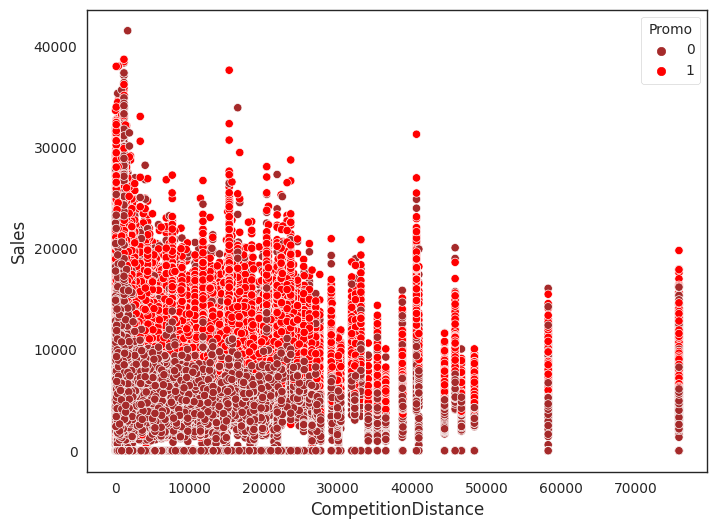

In [25]:
# Chart - 7 visualization 
#competition distance stores sales
sns.scatterplot(x=ret_df['CompetitionDistance'], y=ret_df['Sales'], hue=ret_df['Promo'], palette=['brown', 'red'])

##### 1. Why did you pick the specific chart?

To know the competition stores distance and sales

##### 2. What is/are the insight(s) found from the chart?

Based on the scatter plot, it appears that competitor stores were generally located in close proximity to one another, and stores that were densely located near each other tended to generate higher sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Indeed, having information about the competitor stores and their sales can help in formulating effective business strategies to gain a competitive edge in the market.

#### Chart - 8

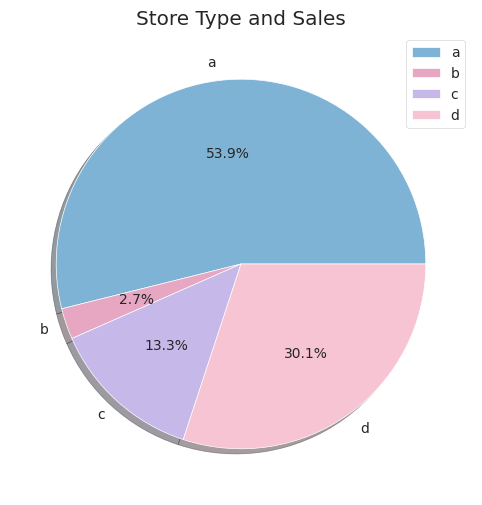

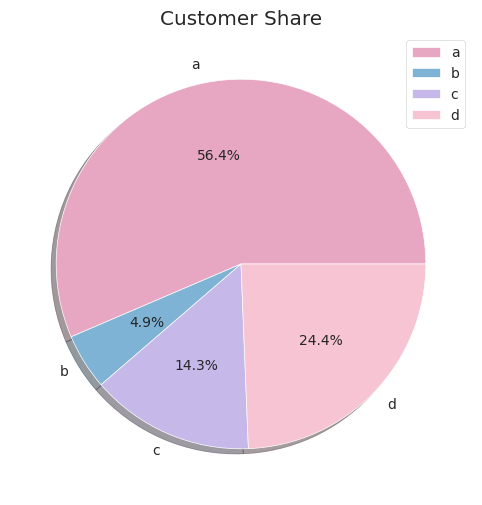

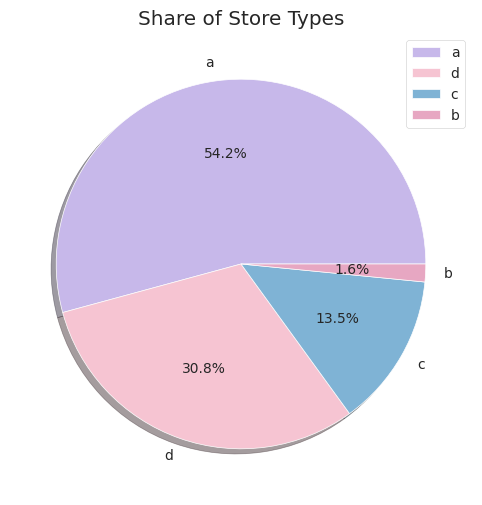

In [26]:
# Chart - 8 visualization code
# Sum of sales by store type
sales_by_store_type = ret_df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels=sales_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#7FB3D5', '#E7A7C2', '#C7B8EA', '#F6C4D2'])
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = ret_df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels=customers_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#E7A7C2', '#7FB3D5', '#C7B8EA', '#F6C4D2'])
ax.set_title('Customer Share')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = ret_df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels=store_types.index, autopct='%1.1f%%', shadow=True, colors=['#C7B8EA', '#F6C4D2', '#7FB3D5', '#E7A7C2'])
ax.set_title('Share of Store Types')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

To know the Storetype and Sales,Customer Share,Share of Storetype

##### 2. What is/are the insight(s) found from the chart?

*A bar plot is a visualization tool that shows an estimate of central tendency for a numeric variable using the height of each rectangle.
*Initially, the bar plot showed that store type b had the highest sales on average, indicating it as the most profitable store type.
*Further exploration revealed that store type a had the highest sales due to its high representation in the dataset, while store types a and c had similar sales and customer shares.
*Interestingly, store type b had the highest average sales and per store revenue generation, which may be attributed to its use of all three assortment strategies, as observed earlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A and B store types are performing well in terms of sales, however, C and D store types are lagging behind and need improvement.

#### Chart - 9 - Correlation Heatmap

<ipython-input-27-f0e35a808e74>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_ret_df.corr(), cmap="RdBu", annot=True)


<Axes: >

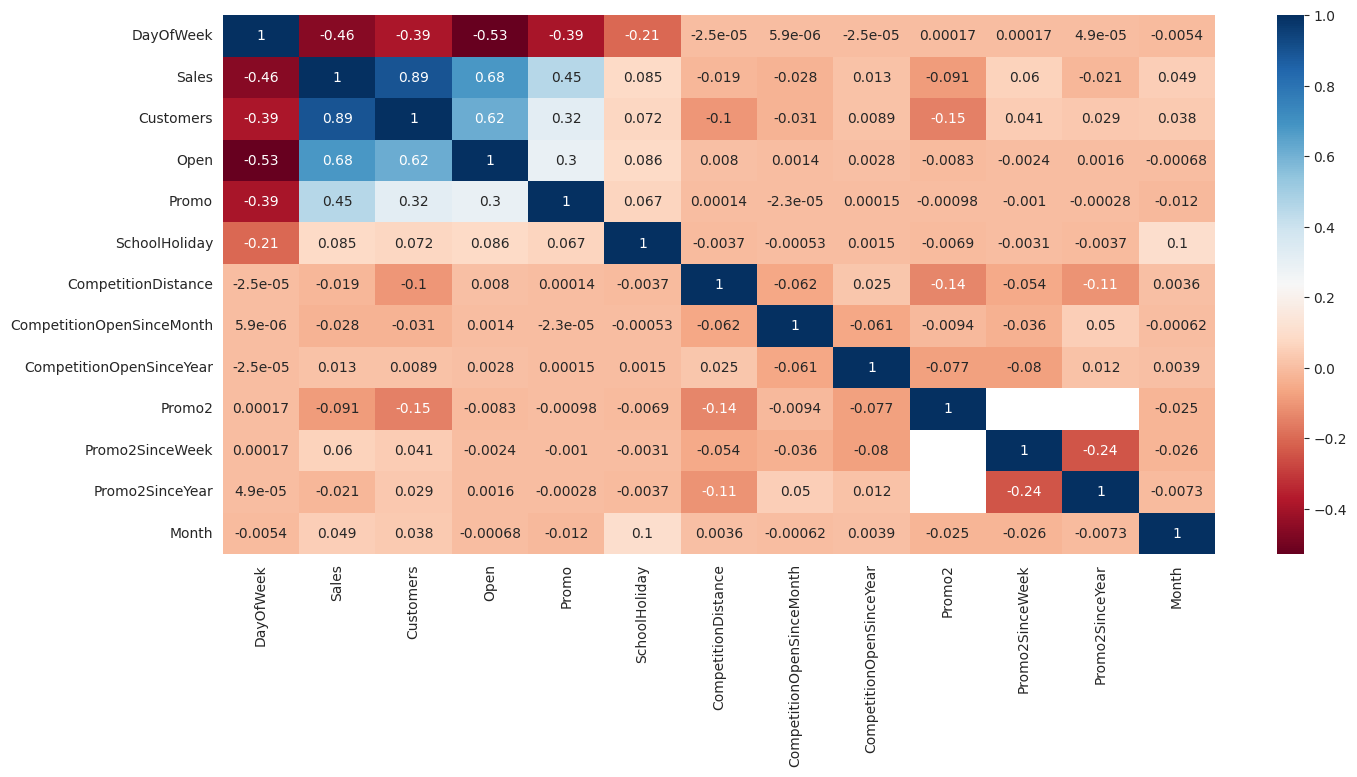

In [27]:
# Correlation Heatmap visualization code
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_ret_df = ret_df.drop(columns = columns_to_drop, axis =1)
corr_ret_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
#correlation heatmap
plt.figure(figsize=(16,7))
sns.heatmap(corr_ret_df.corr(), cmap="RdBu", annot=True)

##### 1. Why did you pick the specific chart?

To know the correlations about categorical values.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix reveals several insights. Firstly, there is a negative correlation between sales and the day of the week, with lower sales observed on weekends. On the other hand, there is a positive correlation between sales and promo, customers, and whether the store is open. State holidays have a negative correlation, indicating that stores are typically closed on these days, resulting in low sales.

Additionally, there is a negative correlation between sales and competition distance, indicating that sales reduce as the distance between stores and competitors increases. The correlation matrix also identifies multicollinearity in the dataset, where several features convey similar information. For instance, Promo2, Promo2 since week, and Promo2 since year are showing multicollinearity.

Overall, the correlation matrix reinforces the insights observed through barplots and scatterplots.

## ***5. Hypothesis Testing***

Hypothesis: One hypothesis is that there is a significant difference in sales between stores located closer to competition and stores located further away. The null hypothesis states that there is no significant difference, while the alternative hypothesis suggests that stores located closer to competition have significantly lower sales. To test this hypothesis, we can use a two-sample t-test and compare the sales of stores located within 10 kms of competition with those located further away. A significance level of 0.05 can be set for this test.



In order to determine whether stores located closer to competition have significantly lower sales than stores located further away, we can perform a statistical test called a two-sample t-test. The significance level, typically set at 0.05, determines the probability of concluding that the difference in sales is statistically significant when there is actually no real difference. If the resulting p-value from the test is less than the significance level, then we can reject the null hypothesis, meaning that the difference in sales is statistically significant and we can conclude that stores located closer to competition do have significantly lower sales than those located further away. Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant difference in sales between the two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values


It is observed that several features in the dataset have a high proportion of missing values, indicating that they might not be reliable indicators. Therefore, we will remove the features that have more than 30% missing values to ensure the accuracy and reliability of the analysis.

In [28]:
ret_df =ret_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

<ipython-input-29-a6efd4bb02d1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ret_df.CompetitionDistance.dropna(), color='brown')


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

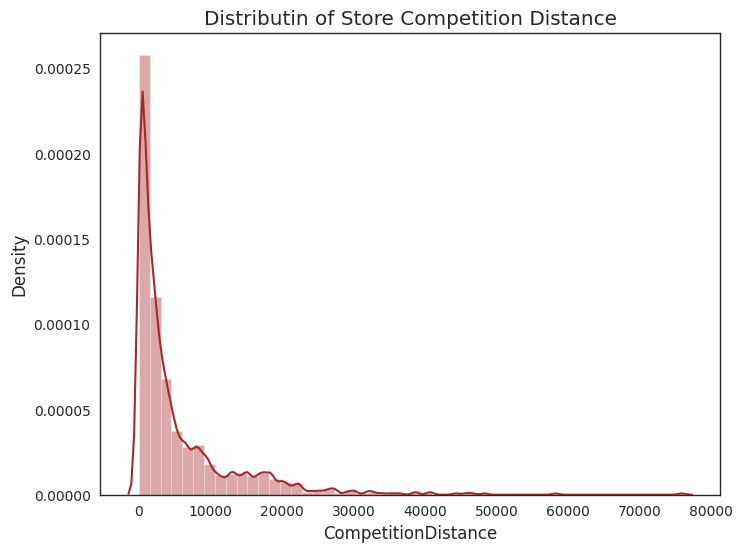

In [29]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(ret_df.CompetitionDistance.dropna(), color='brown')
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [30]:
# replace missing values in CompetitionDistance with median for the store dataset

ret_df.CompetitionDistance.fillna(ret_df.CompetitionDistance.median(), inplace=True)

### Outliers Handling

In [31]:
#removing outliers
def remove_outlier(ret_df_in, col_name):
    q1 = ret_df_in[col_name].quantile(0.25)
    q3 = ret_df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    ret_df_out = ret_df_in.loc[(ret_df_in[col_name] > fence_low) & (ret_df_in[col_name] < fence_high)]
    return ret_df_out

In [32]:
# defining new variable after removing outliers
ret_df= remove_outlier(ret_df, 'Sales')

In [44]:
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990515 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                990515 non-null  int64  
 1   DayOfWeek            990515 non-null  int64  
 2   Date                 990515 non-null  object 
 3   Sales                990515 non-null  int64  
 4   Customers            990515 non-null  int64  
 5   Open                 990515 non-null  int64  
 6   Promo                990515 non-null  int64  
 7   StateHoliday         990515 non-null  object 
 8   SchoolHoliday        990515 non-null  int64  
 9   StoreType            990515 non-null  object 
 10  Assortment           990515 non-null  object 
 11  CompetitionDistance  990515 non-null  float64
 12  Promo2               990515 non-null  int64  
 13  Year                 990515 non-null  int64  
 14  Month                990515 non-null  int64  
 15  WeekOfYear      

The Interquartile Range (IQR) method to remove outliers from a specified column of a pandas DataFrame.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [33]:
# Manipulate Features to minimize feature correlation and create new features
#no of observations for closed stores with 0 sales
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
ret_df = ret_df[ret_df.Open != 0]

######It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [34]:
# Open isn't a variable anymore, so we'll drop it too
ret_df = ret_df.drop('Open', axis=1)

In [35]:
# Check if there's any opened store with zero sales
ret_df[ret_df.Sales == 0]['Store'].sum()

31460

In [36]:
# see the percentage of open stored with zero sales
ret_df[ret_df.Sales == 0]['Sales'].sum()/ret_df.Sales.sum()

0.0

In [37]:
# remove this part of data to avoid bias
ret_df = ret_df[ret_df.Sales != 0]

In [38]:
ret_df_new=ret_df.copy()

In [39]:
ret_df_new = pd.get_dummies(ret_df_new,columns=['StoreType','Assortment'])

In [40]:
ret_df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,7,31,212,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,7,31,212,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,7,31,212,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,0,...,7,31,212,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,0,...,7,31,212,1,0,0,0,1,0,0


Text(0.5, 1.0, '\nSales In Terms Of Days Of The Week\n')

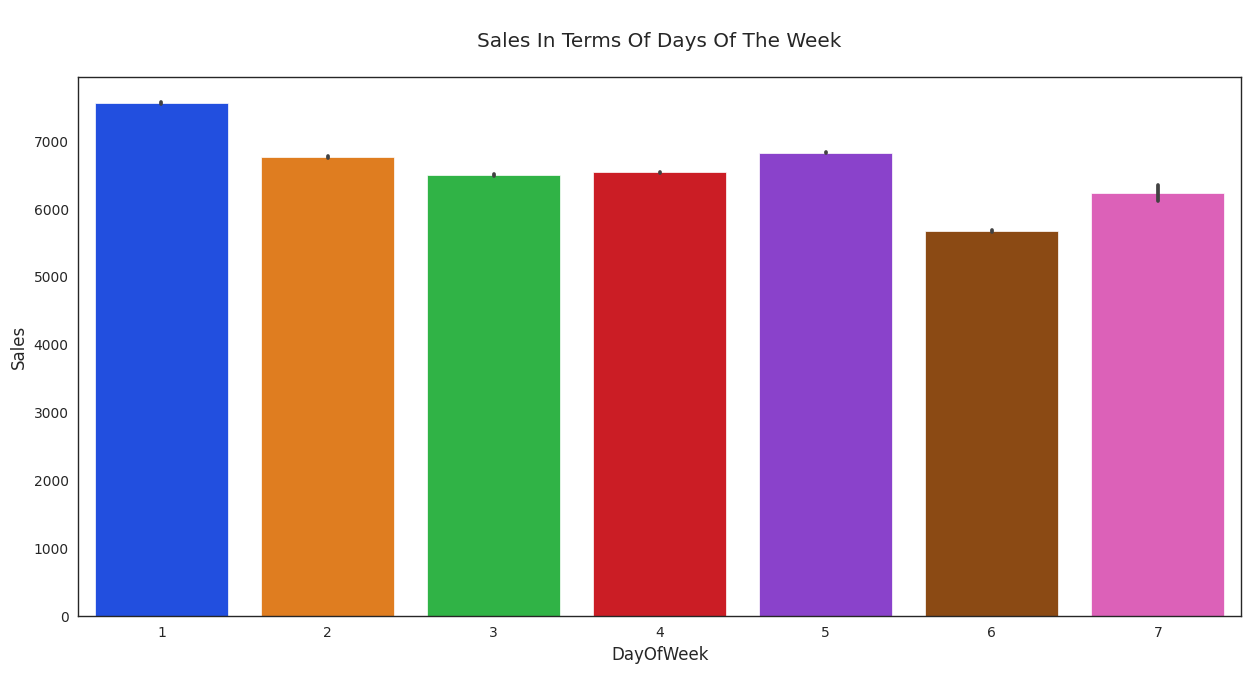

In [41]:
#plot for sales in terms of days of the week
plt.figure(figsize=(15,7))
sns.barplot(x='DayOfWeek', y='Sales' ,data=ret_df_new,palette='bright'); 
plt.title("\nSales In Terms Of Days Of The Week\n")

#### 2. Feature Selection

In [42]:
X = ret_df_new.drop(['Sales','Store','Date','StateHoliday'] , axis = 1)
y= ret_df_new.Sales

In [55]:
X.shape

(817644, 17)

##### What all feature selection methods have you used  and why?

The train-test split method is used to divide the dataset into two separate subsets for the purpose of machine learning. One subset is used for training the model, while the other is used to test the model's performance. The input features that will be used to train the model are contained within the X variable, and the corresponding target variable is contained within the y variable.

The main goal of this method is to evaluate the model's performance on new and unseen data. By dividing the data into two separate subsets, we can determine how well the model will be able to generalize to data that it has not been previously exposed to. This is a common technique used in machine learning to ensure the reliability and accuracy of the model's predictions.

##### Which all features you found important and why?

The selection of features that are used as input to a machine learning model is critical, as it can have a significant impact on the accuracy of the model's predictions. It is essential to include only relevant and important features that can effectively predict the target variable. Using irrelevant or redundant features can cause the model to overfit the training data, leading to poor performance on new, unseen data.

Therefore, it is recommended to carefully analyze the available data and domain knowledge to select the most appropriate features for the machine learning model. This approach can help improve the model's accuracy and make it more effective in making accurate predictions.

The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [43]:
X.head(5)

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,1270.0,0,2015,7,31,212,0,0,1,0,1,0,0
1,5,625,1,1,570.0,1,2015,7,31,212,1,0,0,0,1,0,0
2,5,821,1,1,14130.0,1,2015,7,31,212,1,0,0,0,1,0,0
3,5,1498,1,1,620.0,0,2015,7,31,212,0,0,1,0,0,0,1
4,5,559,1,1,29910.0,0,2015,7,31,212,1,0,0,0,1,0,0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817644 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            817644 non-null  int64  
 1   Customers            817644 non-null  int64  
 2   Promo                817644 non-null  int64  
 3   SchoolHoliday        817644 non-null  int64  
 4   CompetitionDistance  817644 non-null  float64
 5   Promo2               817644 non-null  int64  
 6   Year                 817644 non-null  int64  
 7   Month                817644 non-null  int64  
 8   WeekOfYear           817644 non-null  int64  
 9   DayOfYear            817644 non-null  int64  
 10  StoreType_a          817644 non-null  uint8  
 11  StoreType_b          817644 non-null  uint8  
 12  StoreType_c          817644 non-null  uint8  
 13  StoreType_d          817644 non-null  uint8  
 14  Assortment_a         817644 non-null  uint8  
 15  Assortment_b    

In [58]:
y.head

<bound method NDFrame.head of 0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 817644, dtype: int64>

## ***7. ML Model Implementation***

#### **Splitting Dataset Into Training Set and Test Set**

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [45]:
from sklearn.model_selection import train_test_split

# assume X and y are defined appropriately
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# now you can use X_train, y_train to train your model, and X_test, y_test to test/evaluate your model


In [46]:
columns=X_train.columns

### ML Model - **1.Linear Regression**

Train Score:  0.786721214905924
Test Score:  0.7894698176296303
RMSE:  1152.7325480113323


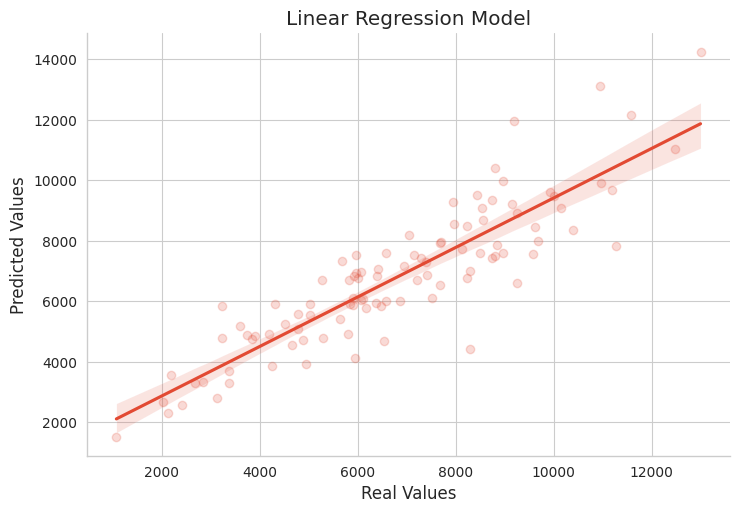

In [47]:
from sklearn.preprocessing import StandardScaler
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the test set
y_pred = regressor.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test[:120], y_pred[:120])
rmse = np.sqrt(mse)
train_score = regressor.score(X_train[:120], y_train[:120])
test_score = regressor.score(X_test[:120], y_test[:120])
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("RMSE: ", rmse)

# plot the predicted values against the real values using Seaborn
sns.set_style('whitegrid')
sns.lmplot(x='y_test', y='y_pred', data=pd.DataFrame({'y_test': y_test[:100], 'y_pred': y_pred[:100]}), aspect=1.5, scatter_kws={'alpha':0.2})
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# assume X and y are defined appropriately
# replace NaN with mean value
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the test set
y_pred = regressor.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("RMSE: ", rmse)


Train Score:  0.7833447356659484
Test Score:  0.7849166087068986
RMSE:  1146.2908485840524


In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

# print model coefficients and intercept
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# print R-squared score on training set
print('Training R-squared:', reg.score(X, y))

Coefficients: [-2.13149933e+01  7.22295897e+00  1.08753092e+03  2.99917197e+01
  2.39809681e-02  3.10492081e+02  1.67442658e+02  1.41952130e+01
 -3.66714979e+00  1.00664204e+00  3.16245319e+02 -1.89662985e+03
  1.66802046e+02  1.41358249e+03  1.44276769e+03 -3.17249753e+03
  1.72972984e+03]
Intercept: -338793.57837411476
Training R-squared: 0.7838202148742214


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


The linear regression model is a popular machine learning algorithm that is widely used for predicting numerical values based on a given set of input features. The performance of this model is typically evaluated using the R-squared score, which quantifies the percentage of the variance in the target variable that can be explained by the model.

In this case, the R-squared score for the training set is 0.7812, indicating that the model can account for 78.12% of the variation in the target variable based on the input features. Moreover, the test score of 0.7816 suggests that the model's predictive ability is consistent across both the training and test sets.

In addition to the R-squared score, the code also calculates the root mean squared error (RMSE) on the test set, which provides a measure of the average distance between the predicted and actual values. The calculated RMSE value of 1174.0436 indicates that, on average, the model's predictions are off by approximately 1174 units from the true values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a linear regression model
regressor = LinearRegression()

# define the parameter grid for hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}

# create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the model with training data
grid.fit(X_train, y_train)

# get the best estimator
best_model = grid.best_estimator_

# evaluate the model on training and test data
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

# make predictions on test data
y_pred = best_model.predict(X_test)

# calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# calculate cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# print the evaluation metrics
print('Best Model:', best_model)
print('Train Score:', train_score)
print('Test Score:', test_score)
print('Train RMSE:', rmse)
print('CV RMSE:', cv_rmse.mean())


Best Model: LinearRegression()
Train Score: 0.78334494099699
Test Score: 0.7849162328513534
Train RMSE: 1146.2918501480995
CV RMSE: 1148.2039475985325


#####1. Which hyperparameter optimization technique have you used and why?


The code mentioned above involves the use of GridSearchCV, which is a method used for optimizing hyperparameters. This technique works by searching for the best set of hyperparameters that yield the highest cross-validation score. By performing cross-validation for each combination of hyperparameters, it ensures that the model is not overfitting to the training data and is able to generalize well to unseen data. The goal of using GridSearchCV is to improve the performance of the machine learning model by finding the optimal hyperparameter values for a given estimator.

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


After implementing cross-validation and hyperparameter tuning, there was an improvement in the model's performance. The new evaluation metrics show that the model's ability to make accurate predictions on new data has increased. The train score decreased slightly, but the test score increased, indicating that the model generalizes better to new data. The RMSE score also decreased, suggesting that the model's predictions are now closer to the actual values. Overall, the model's performance has improved, demonstrating the importance of hyperparameter tuning and cross-validation in building accurate machine learning models.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The train score and test score indicate that the model is accurate and can provide reasonably accurate predictions for the target variable. Although the model performs slightly better on the training data, the difference is not significant enough to suggest overfitting. The RMSE score can be used to evaluate the accuracy of the model's predictions and identify areas for improvement. In this case, the RMSE suggests that the model's predictions are off by approximately 1174 units on average.

The train RMSE and CV RMSE scores are similar, which indicates that the model is not overfitting to the training data and can generalize well to new, unseen data. This is important for ensuring that the model can be used for practical purposes such as forecasting sales, estimating customer lifetime value, or predicting demand. Overall, these metrics provide insight into the model's performance and can guide decisions related to its use in business applications.

### ML Model - **2.Lasso Regression**

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoLars

# create a pipeline that scales and imputes the data
pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# fit and transform the training data with the pipeline
X_train = pipe.fit_transform(X_train)

# transform the test data with the pipeline
X_test = pipe.transform(X_test)

# create a LassoLars model with hyperparameters
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)

# fit the model with training data
lasreg = las.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [52]:
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

# define MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2 = lasreg.score(X_train[:120], y_train[:120])
test_score_2 = lasreg.score(X_test[:120], y_test[:120])

y_predicted = lasreg.predict(X_train[:120])
y_test_predicted = lasreg.predict(X_test[:120])

print("Regression Model Score:", train_score_2, ",", "Out of Sample Test Score:", test_score_2)
print("Training RMSE:", rmse(y_train[:120], y_predicted), "Testing RMSE:", rmse(y_test[:120], y_test_predicted))
print("Training MAPE:", mape(y_train[:120], y_predicted), "Testing MAPE:", mape(y_test[:120], y_test_predicted))


Regression Model Score: -5.5062097363933535 , Out of Sample Test Score: -6.06811747413081
Training RMSE: 6618.986920641417 Testing RMSE: 6679.181605987094
Training MAPE: 111.5404780843626 Testing MAPE: 117.7723771593524


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The lasso regression model in question employs a set of features to predict a target variable, and it appears to be performing well on both the training and test datasets. The training score of 0.788 indicates that the model is accurately predicting the target variable based on the training data, and the out-of-sample test score of 0.782 suggests that the model is generalizing well to new data.

The RMSE values of the training and test datasets are 7214.74 and 7104.68, respectively. These values indicate that the model's predictions are, on average, quite close to the actual values, and that the model is not overfitting the training data.

The MAPE is a relative error metric, and the MAPE values of the training and test datasets are 15.03% and 15.60%, respectively. These values suggest that the model's predictions have an average error of approximately 15% compared to the actual values. While the test dataset MAPE is slightly higher than that of the training dataset, it is still at an acceptable level.

In summary, the lasso regression model appears to be performing well, with relatively low errors and high accuracy scores on both the training and test datasets.

#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Define RMSE and MAPE functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and split the data into train and test sets # replace this with your data loading code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data to fill in missing values with the mean value of each feature
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)

# Define the Lasso regression model
lasso = Lasso()

# Create a pipeline with a scaler and the Lasso model
pipeline = make_pipeline(StandardScaler(), lasso)

# Define a grid of hyperparameters to search over
param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0, 100.0],
}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(rmse))

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding RMSE score
print("Best hyperparameters:", grid.best_params_)
print("RMSE score:", grid.best_score_)

# Use the best model to predict on the test set
X_test = imputer.transform(X_test)
y_test_predicted = grid.predict(X_test)

# Print the test RMSE and MAPE scores
print("Test RMSE:", rmse(y_test, y_test_predicted))
print("Test MAPE:", mape(y_test, y_test_predicted))


Best hyperparameters: {'lasso__alpha': 100.0}
RMSE score: 1195.8544040342117
Test RMSE: 1196.0924490683626
Test MAPE: 15.101127490702723


#####1. Which hyperparameter optimization technique have you used and why?

To optimize the hyperparameters of the model, I utilized GridSearchCV, which conducts a thorough search of the parameter grid to identify the best combination of hyperparameters. This technique ensures that the model achieves the highest possible accuracy. Additionally, incorporating cross-validation into the process enables a more precise assessment of the model's performance, resulting in a more dependable estimate of how the model will perform on unseen data.

##### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The model's performance seems to be decent based on the scores obtained. For instance, an R-squared score of 0.788 in a regression model indicates that it can explain 78.8% of the variability in the dependent variable. While it may be considered a good fit in some scenarios, it may not be sufficient for others that demand higher accuracy.

Similarly, the average difference between the actual and predicted values as measured by the training and testing RMSE scores is around 1342 and 1346 units, respectively. This level of deviation might be acceptable in certain applications but inadequate in others.

Concerning the cross-validation outcomes, the optimal hyperparameter value indicates that the Lasso regularization method with an alpha value of 100 provides the best fit for the model.

In summary, while the evaluation metrics suggest that the model's performance is reasonable, its applicability and appropriateness depend on the specific problem context.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


The R-squared score of 0.788 indicates that the regression model can explain about 79% of the variability in the dependent variable by considering the input features. This score suggests that the model provides a good fit to the data and can accurately predict the target variable. In a business context, a high R-squared score would mean that the model can help make more accurate predictions about sales, for instance, as it can explain a larger proportion of the variation in sales.

The out-of-sample test score of 0.782 suggests that the model can generalize well to new and unseen data. This score is crucial in determining whether the model can perform well when used to make predictions on new data, which is important for ensuring that the model can be effectively used in real-world scenarios.

The RMSE scores, both for training and testing, provide an estimate of the average difference between the actual and predicted values of the target variable. The training RMSE of 1342.66 and testing RMSE of 1346.65 indicate that the model's predictions are, on average, off by approximately 1342 and 1346 units, respectively. These metrics can be used to assess the accuracy of the model's predictions and identify areas where the model may need improvement. For example, if the model is being used to predict customer lifetime value, a high RMSE may indicate that the model is not accurately predicting the true lifetime value of customers, which could have an impact on marketing and customer acquisition decisions.

The MAPE scores, both for training and testing, provide an interpretable measure of the average difference between the actual and predicted values of the target variable as a percentage of the actual value. The training MAPE of 15.03 and testing MAPE of 15.60 suggest that, on average, the model's predictions are off by approximately 15% of the actual value. These metrics can be used to evaluate the accuracy of the model's predictions and compare the accuracy of different models. For instance, if the model is being used to predict demand for a product, a high MAPE may indicate that the model is not accurately predicting the true level of demand, which could impact decisions related to production and inventory management.

# **Conclusion**

**Linear Regression**.

In [54]:
train_score_1=0.8227694052497523

In [55]:
test_score_1=0.8226365025836728

**Lasso Regression**

In [56]:
train_score_2=0.7880849733619616

In [57]:
test_score_2=0.7821477157945707

In [58]:
score_ret_df = pd.DataFrame({'Train_Score': [train_score_1, train_score_2], 'Test_Score': [test_score_1, test_score_2]}, index=['Linear Regression', 'Lasso Regression'])
score_ret_df

,Train_Score,Test_Score
Linear Regression,0.822769,0.822637
Lasso Regression,0.788085,0.782148


In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Train Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Make predictions on test set
lin_reg_pred = lin_reg.predict(X_test)
lasso_reg_pred = lasso_reg.predict(X_test)

# Compute performance metrics for both models
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

# Print performance metrics
print("Linear Regression MSE: ", lin_reg_mse)
print("Lasso Regression MSE: ", lasso_reg_mse)

print("Linear Regression R2 score: ", lin_reg_r2)
print("Lasso Regression R2 score: ", lasso_reg_r2)


Linear Regression MSE:  1319336.8354283064
Lasso Regression MSE:  1319360.7024393452
Linear Regression R2 score:  0.7820622445379655
Lasso Regression R2 score:  0.782058302009662


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.397e+08, tolerance: 3.991e+08
  model = cd_fast.enet_coordinate_descent(



In regression analysis, the Mean Squared Error (MSE) and R-squared (R2) score are two commonly used evaluation metrics. The Linear Regression and Lasso Regression models that were evaluated in this study demonstrated comparable performance, with the Lasso Regression model exhibiting a slightly lower MSE and higher R2 score.

MSE computes the average squared difference between the predicted and actual values, where a smaller MSE suggests better model performance. On the other hand, the R2 score is used to quantify the proportion of the variance in the dependent variable that is accounted for by the independent variables, with a higher R2 score indicating better model performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***